In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [4]:
# 미세먼지가 나쁜 순으로 따릉이 대여량 구하기
#가설1 : 미세먼지가 좋거나 보통일 때 따를이를 많이 사용할 것이다.

pm = ['hour_bef_pm10','hour_bef_pm2.5']

#정렬 순서
pm_order = [ 'good',
           'not bad',
           'bad',
           'very bad']


#미세먼지 수치 pm_order | 매우나쁨 (very bad), 나쁨(bad), 보통(not bad), 좋음(good)
for pm_i in pm:
    train[pm_i]=train[pm_i].apply(lambda x:'very bad'
                                 if x>=76
                                 else 'bad'
                                 if x>=36
                                 else 'not bad'
                                 if x>=16
                                 else 'good')

In [5]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,very bad,not bad,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,bad,bad,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,not bad,not bad,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,bad,bad,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,not bad,good,431.0


In [6]:
# pm_order 순으로 정렬

pm10 = train['hour_bef_pm10'].value_counts()[pm_order]
pm2 = train['hour_bef_pm2.5'].value_counts()[pm_order]

In [8]:
print(pm10)
print(pm2)

good         95
not bad     332
bad         779
very bad    253
Name: hour_bef_pm10, dtype: int64
good        233
not bad     850
bad         358
very bad     18
Name: hour_bef_pm2.5, dtype: int64


In [13]:
# 0은 미세먼지, 1은 초미세먼지

pm10_total=pd.DataFrame()
pm2_total=pd.DataFrame()

for pm_i in pm:
    for col in pm_order:
        if pm_i == 'hour_bef_pm10':
             pm10_total[str(col)]=[int(train[train[pm_i]==col]['count'].sum())]
        else:
             pm2_total[str(col)]=[int(train[train[pm_i]==col]['count'].sum())]       

            
pm2_total=pm2_total.transpose()[0][pm_order]
pm10_total=pm10_total.transpose()[0][pm_order]      

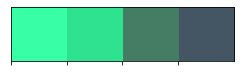

In [14]:
# 따릉이 컬러 !

sns.palplot(['#38FFA5','#2FE290','#447D64', '#445664'])
original_color=['#38FFA5','#2FE290','#447D64', '#445664']

In [16]:
print(pm2_total)
print(pm10_total)

good        25970
not bad     94042
bad         36955
very bad     1427
Name: 0, dtype: int64
good         7580
not bad     37153
bad         90155
very bad    23506
Name: 0, dtype: int64


In [30]:
#가설2 : 따릉이를 이용하는 시간은 출퇴근시간에 가장 많을 것 이다.

#hour은 시간이였던 것이군.. 24시 기준
hour_count = train[['hour','count']]
hour_count

,hour,count
0,20,49.0
1,13,159.0
2,6,26.0
3,23,57.0
4,18,431.0
...,...,...
1454,4,21.0
1455,3,20.0
1456,5,22.0
1457,21,216.0


In [38]:
hour_count['hour'].value_counts()

20    61
4     61
5     61
11    61
22    61
19    61
15    61
7     61
8     61
10    61
1     61
14    61
9     61
3     61
2     61
18    61
23    61
6     61
12    61
13    60
17    60
16    60
0     60
21    60
Name: hour, dtype: int64

In [40]:
hour_count[['hour','count']].value_counts()

hour  count
4     9.0      8
5     10.0     7
      12.0     7
      11.0     7
4     13.0     7
              ..
12    77.0     1
      78.0     1
      80.0     1
      93.0     1
23    186.0    1
Length: 1077, dtype: int64

In [56]:
hour_sum = hour_count.groupby('hour', as_index=True).agg( n = ('count', 'count'),
                              sum = ('count','sum'))
hour_sum

,n,sum
hour,,
0,60,4306.0
1,61,2904.0
2,61,1916.0
3,61,1304.0
4,61,825.0
5,61,800.0
6,61,1498.0
7,61,3804.0
8,61,8338.0


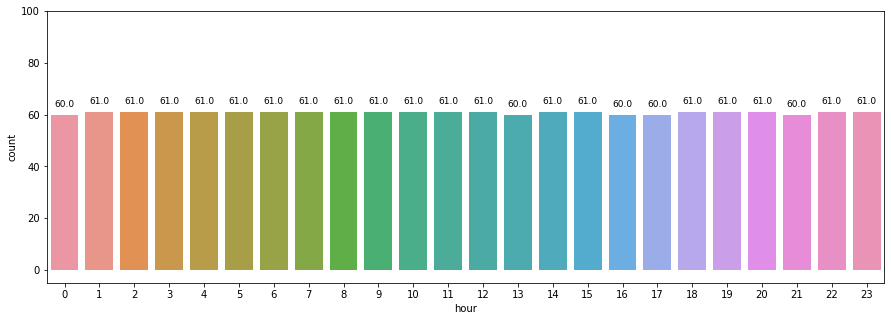

In [92]:
fig = plt.subplots(figsize=(15,5))
ax= sns.countplot(data=train,  x='hour');



for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2, height+3, height, ha='center',size=9)
ax.set_ylim(-5,100)
plt.show()